# №1
Нарисуйте графики, показывающий количество браков и разводов на душу населения в США за период с 2000 года по 2014. Отобразите легенду, подпишите оси.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

us_marriage_divorce = pd.read_csv('data/us-marriages-divorces-1867-2014.csv')

In [2]:
df1 = us_marriage_divorce[us_marriage_divorce["Year"].isin(range(2000, 2015))]


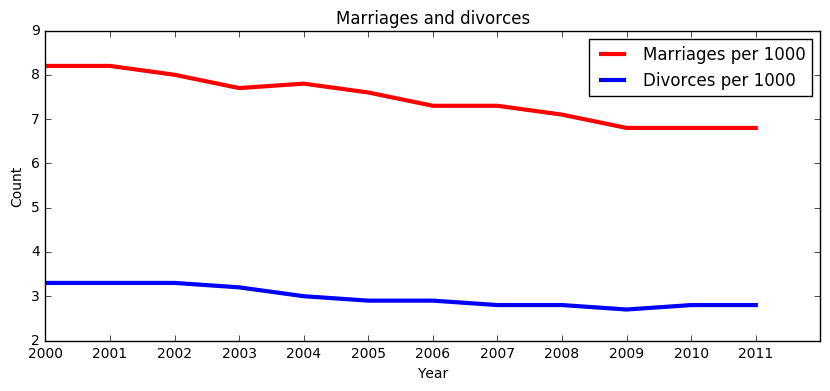

In [3]:
fig, ax = plt.subplots(figsize=(10,4))

xticks = np.arange(len(df1.Year))
xticks_names = df1.Year
ax.plot(xticks, df1.Marriages_per_1000, color='r', linewidth=3.0, label = "Marriages per 1000")
ax.plot(xticks, df1.Divorces_per_1000, color='b', linewidth=3.0, label = "Divorces per 1000")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_names)
ax.set_ylabel('Count')
ax.set_xlabel('Year')
ax.legend()
plt.title('Marriages and divorces')
plt.show()

# №2
Используя subplot, повторить тоже самое, что и в прошлом задании, но зависимости построить на разных графиках, одну под другой.

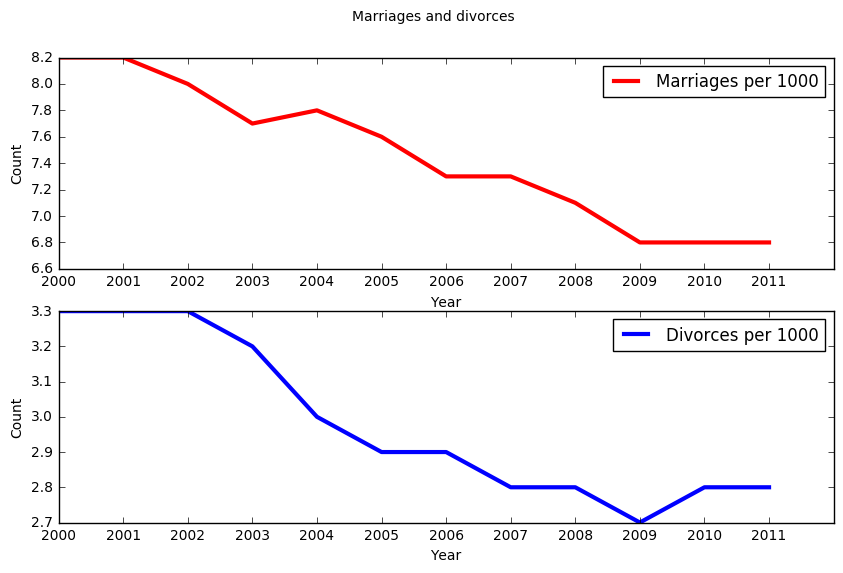

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,6))

xticks = np.arange(len(df1.Year))
xticks_names = df1.Year
ax1.plot(xticks, df1.Marriages_per_1000, color='r', linewidth=3.0, label = "Marriages per 1000")
ax2.plot(xticks, df1.Divorces_per_1000, color='b', linewidth=3.0, label = "Divorces per 1000")
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_names)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_names)
ax1.set_ylabel('Count')
ax1.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_xlabel('Year')
ax1.legend()
plt.suptitle('Marriages and divorces')
ax2.legend()
plt.show()

# №3
Постройте вертикальную столбчатую диаграмму, сравнивающую количество браков и разводов на душу населения в США в 1900, 1950, 2000 годах.

In [5]:
df1900 = us_marriage_divorce[us_marriage_divorce["Year"] == 1900]
df1950 = us_marriage_divorce[us_marriage_divorce["Year"] == 1950]
df2000 = us_marriage_divorce[us_marriage_divorce["Year"] == 2000]

data_mar = (df1900.Marriages_per_1000.values, df1950.Marriages_per_1000.values, df2000.Marriages_per_1000.values)
data_div = (df1900.Divorces_per_1000.values, df1950.Divorces_per_1000.values, df2000.Divorces_per_1000.values)

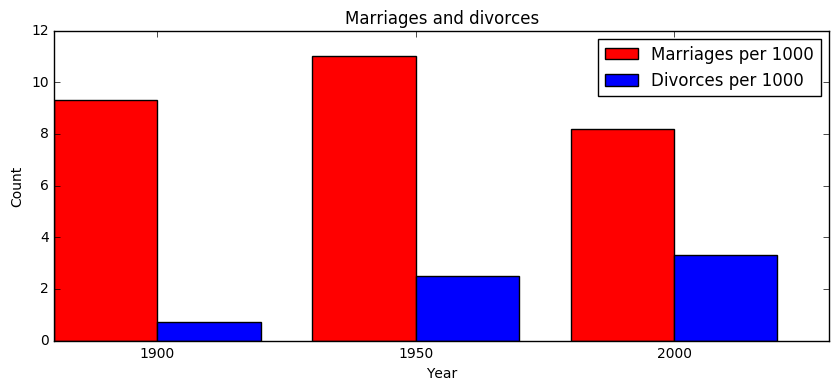

In [6]:
fig, ax = plt.subplots(figsize=(10,4))

width = 0.4
xticks = np.arange(3)
xticks_names = [1900, 1950, 2000]
ax.bar(xticks, data_mar, width, color='r', label = "Marriages per 1000")
ax.bar(xticks+width, data_div, width, color='b', label = "Divorces per 1000")
ax.set_xticks(xticks+width)
ax.set_xticklabels(xticks_names)
ax.set_ylabel('Count')
ax.set_xlabel('Year')
ax.legend()
plt.title('Marriages and divorces')
plt.show()

# №4
Постройте горизонтальную столбчатую диаграмму, сравнивающую количество убийств, совершенных актером в кинофильмах.

In [7]:
actor_kills = pd.read_csv('data/actor_kill_counts.csv')

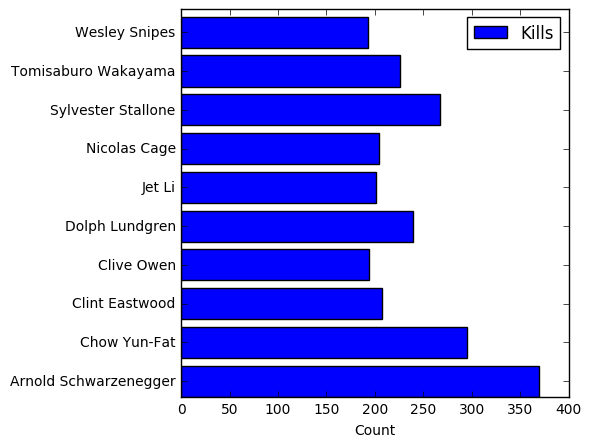

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

width = 0.8
yticks = np.arange(actor_kills.Count.size)
ax.barh(yticks, actor_kills.Count, width, color='b', label = "Kills")
ax.set_yticklabels(actor_kills.Actor)
ax.set_yticks(yticks+width/2)
ax.set_xlabel('Count')
ax.legend()
plt.show()

#  №5
Постройте точечный график, показывающий зависимость между количеством выданных докторских степеней в Computer Science и общей выручкой от продаж компьютерных игр.

In [9]:
arcade_revenue_vs_cs_doctorates = pd.read_csv('data/arcade-revenue-vs-cs-doctorates.csv')

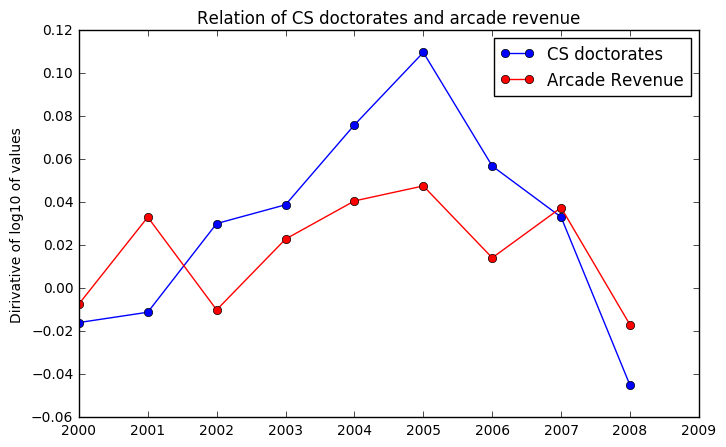

In [30]:
plt.figure(figsize=(8, 5))
years = arcade_revenue_vs_cs_doctorates.Year.values

plt.plot(np.diff(np.log10(arcade_revenue_vs_cs_doctorates["Computer Science Doctorates Awarded (US)"].values)), 
         'bo-', label="CS doctorates")
plt.plot(np.diff(np.log10(arcade_revenue_vs_cs_doctorates["Total Arcade Revenue (billions)"].values)), 
         'ro-', label="Arcade Revenue")
plt.xticks(range(len(years)), years)
plt.ylabel('Dirivative of log10 of values')
plt.legend()
plt.title('Relation of CS doctorates and arcade revenue')
plt.show()

# №6
Нарисуйте круговую диаграмму, показывающую соотношение способов умереть среди римских императоров.

In [11]:
roman_emperors = pd.read_csv('data/roman-emperor-reigns.csv')

In [12]:
roman_emperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [13]:
labels = roman_emperors.Cause_of_Death.unique()
counts = roman_emperors.Cause_of_Death.value_counts()

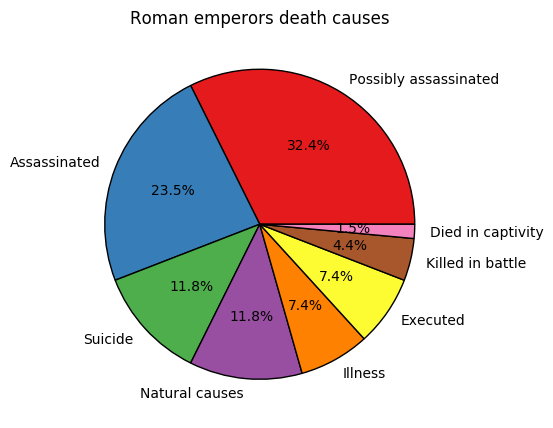

In [14]:
plt.figure(figsize=(5,5))

colors = plt.cm.Set1(np.linspace(0,1,9))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Roman emperors death causes')
plt.show()

# №7
Нарисуйте гистограмму, описывающую распределение времени правления среди убитых императоров и среди всех.

In [15]:
bins = 40
hist1, xticks1 = np.histogram(roman_emperors.Length_of_Reign.values, bins)

causes = ['Assassinated', 'Possibly assassinated', 'Executed', 'Executed']
hist2, xticks2 = np.histogram(roman_emperors
                              [roman_emperors.Cause_of_Death.isin(causes)].Length_of_Reign.values, bins)

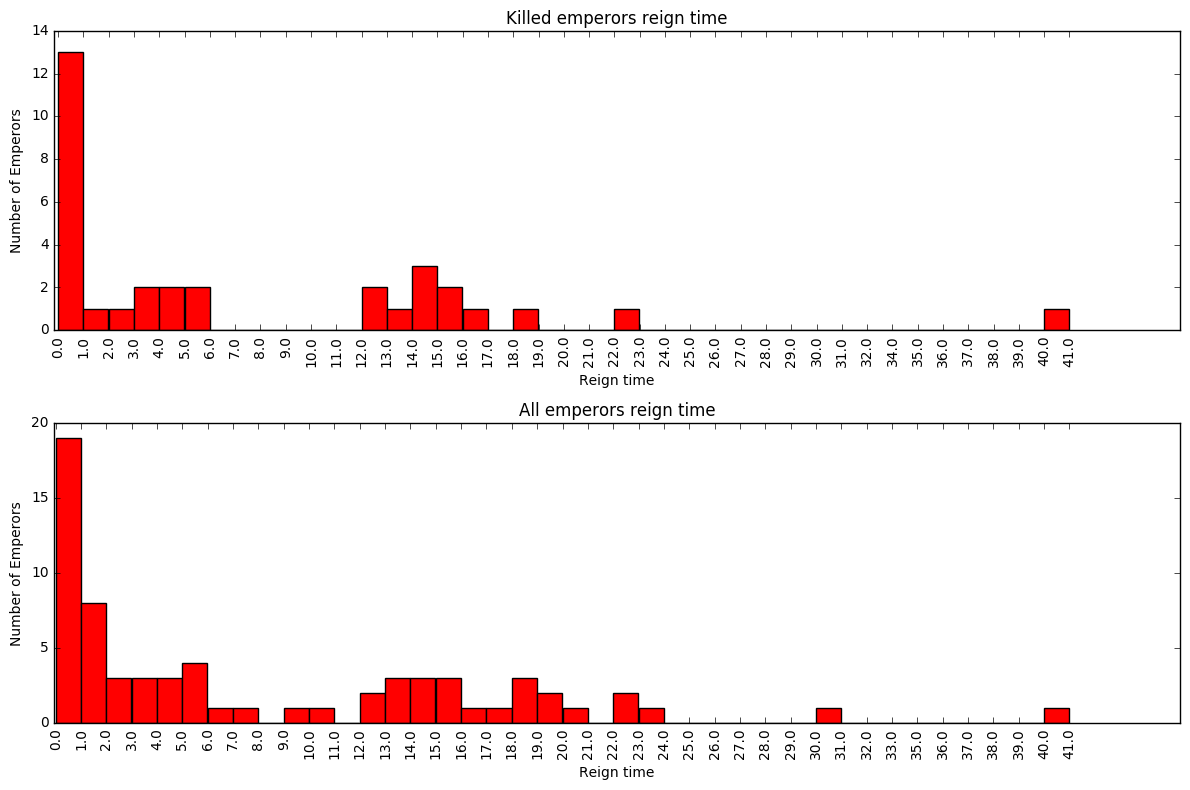

In [16]:
fig, (ax2, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

width = 1
ax1.bar(xticks1[:-1], hist1, width, color='r')
ax2.bar(xticks2[:-1], hist2, width, color='r')

ax1.set_xticks(xticks1)
ax2.set_xticks(xticks2+width/2)
ax1.set_xticklabels(np.round(xticks1), rotation='vertical')
ax2.set_xticklabels(np.round(xticks2), rotation='vertical')
ax1.set_ylabel('Number of Emperors')
ax2.set_ylabel('Number of Emperors')
ax1.set_xlabel('Reign time')
ax2.set_xlabel('Reign time')
ax2.set_title('Killed emperors reign time')
ax1.set_title('All emperors reign time')
plt.tight_layout()
plt.show()